In [1]:
from microstruktur.signal_models import three_dimensional_models
from microstruktur.signal_models import spherical_mean
from microstruktur.signal_models.utils import T1_tortuosity, parameter_equality, define_shell_indices
from os.path import join
from scipy import optimize
from scipy.stats import pearsonr
# import pandas

In [2]:
import pkg_resources
DATA_PATH = '/user/rfick/home/microstruktur/microstruktur/data/'
# DATA_PATH = pkg_resources.resource_filename(
#     'microstruktur', 'data/'
# )

In [3]:
bvals = np.loadtxt(join(three_dimensional_models.GRADIENT_TABLES_PATH, 'bvals_hcp_wu_minn.txt'))
gradient_directions = np.loadtxt(join(three_dimensional_models.GRADIENT_TABLES_PATH, 'bvecs_hcp_wu_minn.txt'))

shell_indices, shell_bvalues = define_shell_indices(bvals, ((0, 10), (995, 1005), (1995, 2005), (2995, 3005)))
number_of_shells = shell_indices.max()

In [4]:
data_1_7 = np.loadtxt(join(DATA_PATH, 'data_camino_D1_7.txt'))
fractions_1_7 = np.loadtxt(DATA_PATH +'fractions_camino_D1_7.txt')
data_2_0 = np.loadtxt(join(DATA_PATH, 'data_camino_D2_0.txt'))
fractions_2_0 = np.loadtxt(DATA_PATH +'fractions_camino_D2_0.txt')
data_2_3 = np.loadtxt(join(DATA_PATH, 'data_camino_D2_3.txt'))
fractions_2_3 = np.loadtxt(DATA_PATH +'fractions_camino_D2_3.txt')
data_axcaliber_1_7 = np.loadtxt(join(DATA_PATH, 'data_camino_axcaliber_D1_7.txt'))
fractions_axcaliber_1_7 = np.loadtxt(DATA_PATH +'fractions_camino_axcaliber_D1_7.txt')

In [5]:
data_multidif = np.r_[data_1_7, data_2_0, data_2_3]
fractions_multidif = np.r_[fractions_1_7, fractions_2_0, fractions_2_3]

In [6]:
data_1_7_dispersed = np.loadtxt(join(DATA_PATH, 'data_camino_dispersed_D1_7.txt'))
parameters_1_7_dispersed = np.loadtxt(DATA_PATH +'parameters_camino_dispersed_D1_7.txt')
fractions_1_7_dispersed = parameters_1_7_dispersed[:,0]

data_2_0_dispersed = np.loadtxt(join(DATA_PATH, 'data_camino_dispersed_D2_0.txt'))
parameters_2_0_dispersed = np.loadtxt(DATA_PATH +'parameters_camino_dispersed_D2_0.txt')
fractions_2_0_dispersed = parameters_2_0_dispersed[:,0]

data_2_3_dispersed = np.loadtxt(join(DATA_PATH, 'data_camino_dispersed_D2_3.txt'))
parameters_2_3_dispersed = np.loadtxt(DATA_PATH +'parameters_camino_dispersed_D2_3.txt')
fractions_2_3_dispersed = parameters_2_3_dispersed[:,0]

In [7]:
data_multidif_dispersed = np.r_[data_1_7_dispersed, data_2_0_dispersed, data_2_3_dispersed]
fractions_multidif_dispersed = np.r_[fractions_1_7_dispersed, fractions_2_0_dispersed, fractions_2_3_dispersed]

In [14]:
# from dipy.core.gradients import gradient_table
# from dipy.reconst import dki

# gtab = gradient_table(bvals=bvals, bvecs=gradient_directions)

# dki_model = dki.DiffusionKurtosisModel(gtab)
# dki_fit = dki_model.fit(data_1_7)
# dki_fit_dispersed = dki_model.fit(data_1_7_dispersed)
# dki_fit_multidif = dki_model.fit(data_multidif)
# dki_fit_multidif_dispersed = dki_model.fit(data_multidif_dispersed)

# # not dispersed: radial (perpendicular) kurtosis is highest
# k_max = dki_fit.rk(max_kurtosis=10)
# dki_fintra = k_max / (k_max + 3)

# # dispersed: radial (perpendicular) kurtosis is highest
# k_max = dki_fit_dispersed.rk(max_kurtosis=10)
# dki_fintra_dispersed = k_max / (k_max + 3)

# # dispersed: radial (perpendicular) kurtosis is highest
# k_max = dki_fit_multidif.rk(max_kurtosis=10)
# dki_fintra_multidif = k_max / (k_max + 3)

# # dispersed: radial (perpendicular) kurtosis is highest
# k_max = dki_fit_multidif_dispersed.rk(max_kurtosis=10)
# dki_fintra_multidif_dispersed = k_max / (k_max + 3)

In [15]:
# np.savetxt(DATA_PATH + "res_wmti.txt", dki_fintra)
# np.savetxt(DATA_PATH + "res_wmti_disp.txt", dki_fintra_dispersed)
# np.savetxt(DATA_PATH + "res_wmti_mult.txt", dki_fintra_multidif)
# np.savetxt(DATA_PATH + "res_wmti_disp_mult.txt", dki_fintra_multidif_dispersed)

In [8]:
dki_fintra = np.loadtxt(DATA_PATH + "res_wmti.txt")
dki_fintra_dispersed = np.loadtxt(DATA_PATH + "res_wmti_disp.txt")
dki_fintra_multidif = np.loadtxt(DATA_PATH + "res_wmti_mult.txt")
dki_fintra_multidif_dispersed = np.loadtxt(DATA_PATH + "res_wmti_disp_mult.txt")

In [9]:
# estimating pearson correlation with ground truth
pr = pearsonr(dki_fintra, fractions_1_7)
pr_dispersed = pearsonr(dki_fintra_dispersed, fractions_1_7_dispersed)
pr_multidif = pearsonr(dki_fintra_multidif, fractions_multidif)
pr_multidif_dispersed = pearsonr(dki_fintra_multidif_dispersed, fractions_multidif_dispersed)

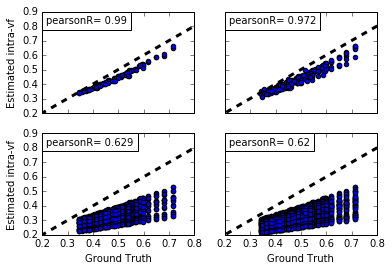

In [11]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(fractions_1_7, dki_fintra)
ax2.scatter(fractions_multidif, dki_fintra_multidif)
ax3.scatter(fractions_1_7_dispersed, dki_fintra_dispersed)
ax4.scatter(fractions_multidif_dispersed, dki_fintra_multidif_dispersed)

ax1.text(.216, .817, 'pearsonR= '+str(np.round(pr[0], 3)), fontsize=10, bbox=dict(facecolor='white', alpha=1))
ax2.text(.216, .817, 'pearsonR= '+str(np.round(pr_multidif[0], 3)), fontsize=10, bbox=dict(facecolor='white', alpha=1))
ax3.text(.216, .817, 'pearsonR= '+str(np.round(pr_dispersed[0], 3)), fontsize=10, bbox=dict(facecolor='white', alpha=1))
ax4.text(.216, .817, 'pearsonR= '+str(np.round(pr_multidif_dispersed[0], 3)), fontsize=10, bbox=dict(facecolor='white', alpha=1))

# ax1.set_title('Static Diffusivity')
ax3.set_xlabel('Ground Truth')
# ax2.set_title('Varying Diffusivity')
ax1.set_ylabel('Estimated intra-vf')
ax4.set_xlabel('Ground Truth')
ax3.set_ylabel('Estimated intra-vf')

ax1.plot([0, 1], [0, 1], ls='--', c='k', lw=3)
ax2.plot([0, 1], [0, 1], ls='--', c='k', lw=3)
ax3.plot([0, 1], [0, 1], ls='--', c='k', lw=3)
ax4.plot([0, 1], [0, 1], ls='--', c='k', lw=3)
ax1.set_ylim(0.2, .9)
ax1.set_xlim(0.2, .8)
ax4.set_ylim(0.2, .9)
ax4.set_xlim(0.2, .8)

savefig('/user/rfick/home/Work/neuroimage_review/results_WMTI.png', dpi=120)